# Section 8. Bayesian regression

Up to this point, we have seen linear and nonlinear regression, with or without regularization. All these methods fall under the hat of *frequentist approaches* as they assume that there are enough measurements to say something meaningful about $\boldsymbol{\theta}$ and provide a sigle best estimate for a given training set. Such methods provide good models whenever the relationship between the independent and dependent variables is well understood and relatively stable. However, in real case scenarios, we are often confronted with uncertainty or variability in the data and deterministic methods are not appropriate. To this end, a powerful, alternative tool is provided by Bayesian regression methods.

Bayesian regression is able to provide predictions in the form of probability distributions incorporating uncertainty estimates. In this Section we set the basis for the understanding of such methodologies by focusing on two approaches: linear Bayesian and Gaussian process regression. 

## Linear Bayesian regression

In simple linear regression, we aim to find the best-fit line that explains the relationship between two variables. Bayesian Linear Regression extends this same concept by considering uncertainty in both the model parameters and the predictions. Instead of relying on a single line, it thus provides a distribution of possible lines, accounting for the uncertainty in the data.

Linear Bayesian regression starts by assuming a linear relationship between the independent variables $\mathbf{X}$ and the dependent variable $\mathbf{y}$

\begin{equation}
y = \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\epsilon},
\end{equation}

where $\boldsymbol{\theta}$ are the model parameters and $\boldsymbol{\epsilon}$ represents an error term assumed to follow a zero-mean Gaussian distribution, $\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \sigma^2 \mathbf{I})$, where $\mathbf{I}$ is the identity matrix and $\sigma^2$ is the variance.

### Bayesian inference
Bayesian inference allows to infer a posterior distribution $p(\boldsymbol{\theta}|\mathbf{X},\mathbf{y})$ -- in our case, that of the parameters -- representing updated beliefs given the observed independent variables $\mathbf{X}$ and dependent variable $\mathbf{y}$. To this end, we use Bayes’ formula, i.e.,

\begin{equation}
    p(\boldsymbol{\theta}|\mathbf{X},\mathbf{y}) \propto p(\mathbf{X}, \mathbf{y}|\boldsymbol{\theta})\, p(\boldsymbol{\theta}),
    \label{eq:bayes}
\end{equation}

where $p(\boldsymbol{\theta})$ is the prior distribution over $\boldsymbol{\theta}$, incorporating prior beliefs about the parameters values before observing any data, while $p(\mathbf{y} | \mathbf{X}, \boldsymbol{\theta})$ is the likelihood function, quantifying instead the probability of observing the dependent variable $\mathbf{y}$ given the independent variables $\mathbf{X}$ and the parameters $\boldsymbol{\theta}$.

### Prior and posterior
In principle, any prior $p(\boldsymbol{\theta})$ could be used, however the functional form of most priors, when multiplied by the functional form of the likelihood in Bayes's formula, results in an posterior $p(\boldsymbol{\theta}|\mathbf{X},\mathbf{y})$ with no closed-form solution.\\
In such scenarios, the solution is to resort to approximate Bayesian inference techniques as Monte Carlo methods. But, certain priors are mathematically convenient because they result in posteriors with tractable, well-known densities.

The simplest and most widely used version of linear Bayesian regression is the \textit{normal linear model}, in which $\mathbf{y}$ given $\mathbf{X}$ -- $p(\mathbf{X}, \mathbf{y}|\boldsymbol{\theta})$ -- is distributed Gaussian. In this model, and under a particular choice of the prior for the parameters -- namely, when the prior is conjugate, meaning that the prior and posterior share the same functional form -- the posterior can be found analytically. With more arbitrarily chosen priors, the posteriors generally have to be approximated. 

### Posterior predictive
Once we have the posterior distribution $p(\boldsymbol{\theta}|\mathbf{X},\mathbf{y})$, we can make predictions for new, unseen data points.

One common approach is to generate posterior predictive samples by drawing parameter values from the posterior distribution and using them to make predictions \cite{bishop2006pattern}.
To make predictions, we draw a posterior predictive distribution $p(\mathbf{y}_*|\mathbf{y})$, distribution over unobserved data $\mathbf{y}_*$.


As an example on Bayesian regression, we refer to the implementation in https://github.com/gwgundersen/bayesian-linear-regression.

## Gaussian process regression

### Inference

Gaussian process regression (GPR) is a nonparametric, Bayesian approach to regression (and, after the above digression, this should now be clear!). In particular, GPR uses a Gaussian process prior to infer the distribution of possible functions that could generate the observed data.

Given a set of training data $\mathcal{D} = (\mathbf{X}, \mathbf{y}) \equiv{(\mathbf{x}^{(i)}, y^{(i)})}_{i=1}^{n}$, the idea is to estimate the underlying function $f(\cdot)$ by placing a Gaussian process over $f(\mathbf{X})$. Typically, a mean of zero is assumed, leading to the following distribution:

Let us see how we can perform Gaussian process regression using Scikit-learn. We consider the same polynomial regression example, with data generated from a combination of trigonometric functions with random additive noise.

\begin{equation}
    \mathbf{y} = f(\mathbf{X}) \sim \mathcal{N}(\mathbf{0},\mathbf{K}),
\end{equation}

where $\mathbf{K}\equiv k(\mathbf{X},\mathbf{X})$ denotes the covariance matrix generated by the kernel function $k$ chosen (e.g., periodic, linear, radial basis function) and describes the general shape of the function. Note that the choice of the kernel is crucial in identifying a good (or a bad) fit of the data.

To predict the values of a new set of dependent variables $\mathbf{y}_*$, given a new set of independent variables $\mathbf{X}_*$, we need to estimate the conditional distribution $p(\mathbf{y}_* | \mathbf{X}_*, \mathcal{D})$. According to the properties of GP \cite{murphy2018machine}, the joint distribution of the training and test outputs follows a joint Gaussian distribution:

\begin{equation}
\begin{bmatrix}
\mathbf{y} \\
\mathbf{y}_*
\end{bmatrix}=f\left(
\begin{bmatrix}
\mathbf{x}\\
\mathbf{x}_*
\end{bmatrix}\right)
\sim
\mathcal{N}\left(\mathbf{0}, 
\begin{bmatrix}
\mathbf{K} & \mathbf{K}_* \\
\mathbf{K}_*^{\text{T}} & \mathbf{K}_{**}
\end{bmatrix}
\right),
\end{equation}

where $\mathbf{K}_* \equiv k(\mathbf{X}, \mathbf{x}_*)$ and $\mathbf{K}_{**} \equiv k(\mathbf{x}_*, \mathbf{x}_*)$. While the above joint distribution gives some insight into how $f(\mathbf{x}_*)$ relates to $f(\mathbf{x})$, at this point, no prediction for the new datum $\mathbf{x}_*$ can be made.

To obtain the posterior distribution of the predicted GP realizations $f(\mathbf{x}_*)$, we condition the prior distribution on the training data. This leads to the following mean and covariance predictions for the test point $\mathbf{x}_*$ for the detailed derivation):

\begin{equation}
\begin{split}
\mu\big(f(\mathbf{x}_*)\big) &= \mathbf{K}_*^{\text{T}} \mathbf{K}^{-1} \mathbf{y},\\
\text{Cov}\big(f(\mathbf{x}_*)\big) &= \mathbf{K}_{**} - \mathbf{K}_* \mathbf{K}^{-1} \mathbf{K}_*^{\text{T}}.
\end{split}
\end{equation}

These equations provide the mean and covariance predictions for the output $f(\mathbf{x}_*)$ given the training dataset and a new input $\mathbf{x}_*$.

### Inference in the presence of noise

In real-world scenarios, we often encounter observations with measurement noise. In such scenarios, it is more appropriate to model the training targets $\mathbf{y}$ to be noisy realizations of a Gaussian process $f(\mathbf{X})$,

\begin{equation}
    \mathbf{y} = f(\mathbf{X}) \sim \mathcal{N}(\mathbf{0},\mathbf{K})+ \epsilon, \quad  {\epsilon}\sim \mathcal{N}(0,\sigma^2),
\end{equation}

where the noise $\epsilon$ is parameterized by a zero-mean Gaussian with positive noise covariance values given by $\sigma^2$, which is a hyperparameter.

By repeating the steps above, we obtain the following joint distribution of the training and new outputs

\begin{equation}
f\left(
\begin{bmatrix}
\mathbf{x}\\
\mathbf{x}_*
\end{bmatrix}\right)
\sim
\mathcal{N}\left(\mathbf{0}, 
\begin{bmatrix}
\mathbf{K}+\sigma^2\mathbf{I} & \mathbf{K}_* \\
\mathbf{K}_*^{\text{T}} & \mathbf{K}_{**}
\end{bmatrix}
\right).
\end{equation}

As before, but now with the noise term, we can obtain the predictive mean and variance

\begin{equation}
\begin{split}
\mu\big(f(\mathbf{x}_*)\big) &= \mathbf{K}_*^{\text{T}} \left( \mathbf{K} +\sigma^2\mathbf{I} \right)^{-1} \mathbf{y},\\
\text{Cov}\big(f(\mathbf{x}_*)\big) &= \mathbf{K}_{**} - \mathbf{K}_* \left( \mathbf{K} +\sigma^2\mathbf{I} \right)^{-1} \mathbf{K}_*^{\text{T}}+\sigma^2.
\end{split}
\end{equation}

### Example

In the code hereinafter, we first fit a Gaussian process on the training data using a radial basis function (RBF) kernel and, additionally, a noise parameter (alpha). Then, we use the kernel to compute the mean predictions (norm_y_mean) for the train and test set and plot the 95\% confidence interval (defined as norm_y_mean $\pm1.96$ norm_y_std).

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(42)

def scaling(x,fit=False,transform=False,inverse_transform=False,norm=True,param=None):
    
    ''' scale variable x
        :param x: variable
        :type x:  umpy array
        :param fit: find scaling parameters
        :type fit:  bool
        :param transform: scale x
        :type transform:  bool
        :param inverse_transform: inverse scale x
        :type inverse_transform:  bool
        :param norm: inverse scale x
        :type norm:  bool
        :param fit: scaling parameters
        :type fit:  list
    
        :return: scaling parameters (if fit=False)
                 :rtype: list 
                 scaled x (if transform=True)
                 :rtype: numpy array 
                 inverse scaled x (if inverse_transform=True)
                 :rtype: numpy array
    '''
    
    if fit==True:
        if norm==True:
            min_ = np.amin(x); max_ = np.amax(x)
            a = 0.5*(max_-min_)
            b = 0.5*(max_+min_)
        else:
            a = np.std(x)
            b = np.mean(x)
        return [a,b]
    elif transform==True:
        return np.divide(x-param[1],param[0])
    elif inverse_transform==True:
        return np.multiply(x,param[0])+param[1]

Data set generation, split in train and test set, and scale features

In [2]:
n_snapshots = 200
noise = np.random.normal(0,0.5,(n_snapshots,1)) # generate Gaussian noise
X = np.random.uniform(-np.pi,np.pi,(n_snapshots,1))
y = np.sin(np.abs(X))+np.sin(X)**2+ noise

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split into training and test sets
param_x = scaling(X_train,fit=True) # scaling params for independent variable X
param_y = scaling(y_train,fit=True) # scaling params for dependent variable y
# Scale independent variables (training and test sets)
norm_X_train = scaling(X_train,transform=True,param=param_x) 
norm_X_test = scaling(X_test,transform=True,param=param_x) 
# Scale dependent variables (training and test sets)
norm_y_train = scaling(y_train,transform=True,param=param_y)
norm_y_test = scaling(y_test,transform=True,param=param_y)

Implementation using Scikit-learn

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
# define a radial basis function kernel
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(0.001, 10)) # 
GPR = GaussianProcessRegressor(kernel=kernel,
                               alpha=0.5**2) # noise term
GPR.fit(norm_X_train, norm_y_train) # find mean and covariance matrix
# posterior distribution
x = np.expand_dims(np.linspace(-np.pi,np.pi,200),1)
norm_x = scaling(x,transform=True,param=param_x)
norm_y_mean, norm_y_std = GPR.predict(norm_x, return_std=True) # see previous example

The predictions are plotted below and compared with the training and test data.

Not only the fit in terms of the expected (mean) value is extremely good, but in addition, due to the intrinsic probabilistic nature of GPR, we are also able to compute confidence intervals and thus quantify uncertainties.

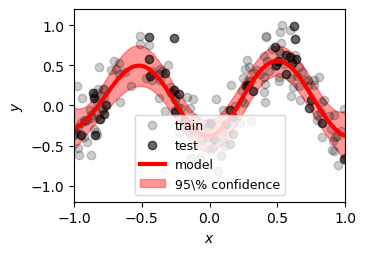

In [10]:
# re-generate data set without measurement noise
X = np.linspace(-np.pi,np.pi,(n_snapshots))
y = np.sin(np.abs(X))+np.sin(X)**2
y = scaling(y,transform=True,param=param_y)
X = scaling(X,transform=True,param=param_x)

# plot predictions, training and test data, and true model
fig = plt.figure(figsize=(3.5, 2.5))
plt.plot(norm_X_train,norm_y_train,'o',color='black',alpha=0.2,markersize=6,label='train')
plt.plot(norm_X_test,norm_y_test,'o',color='black',alpha=0.6,markersize=6,label='test')
plt.plot(norm_x,norm_y_mean,color='red',alpha=1,linewidth=3,linestyle='-',markersize=0,label='model')
plt.fill_between(
    norm_x.ravel(),
    norm_y_mean[:,0] - 1.96 * norm_y_std,
    norm_y_mean[:,0] + 1.96 * norm_y_std,
    alpha=0.4,
    color='red',
    label=r"95\% confidence",
 )
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.ylim(-1.2,1.2)
plt.xlim(-1,1)
plt.legend(loc='best',fontsize="9")
plt.show()